# Movie Genre Prediction
- Notebook focuses on forecasting genre based on Movie entered

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SArie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SArie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Importing dataset

In [121]:
names = ['ID','Title','Genre','Description']
movie_df = pd.read_csv('Datasets/Genre Classification Dataset/train_data.txt', sep=':::', engine='python', names=names)

In [123]:
movie_df.head()

ID                               Title       Genre  \
0   1       Oscar et la dame rose (2009)       drama    
1   2                       Cupid (1997)    thriller    
2   3   Young, Wild and Wonderful (1980)       adult    
3   4              The Secret Sin (1915)       drama    
4   5             The Unrecovered (2007)       drama    

                                         Description  
0   Listening in to a conversation between his do...  
1   A brother and sister with a past incestuous r...  
2   As the bus empties the students for their fie...  
3   To help their unemployed father make ends mee...  
4   The film's title refers not only to the un-re...

In [125]:
movie_df.iloc[0]['Description']

' Listening in to a conversation between his doctor and parents, 10-year-old Oscar learns what nobody has the courage to tell him. He only has a few weeks to live. Furious, he refuses to speak to anyone except straight-talking Rose, the lady in pink he meets on the hospital stairs. As Christmas approaches, Rose uses her fantastical experiences as a professional wrestler, her imagination, wit and charm to allow Oscar to live life and love to the full, in the company of his friends Pop Corn, Einstein, Bacon and childhood sweetheart Peggy Blue.'

## Dataset Info

In [128]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54214 non-null  int64 
 1   Title        54214 non-null  object
 2   Genre        54214 non-null  object
 3   Description  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


### Observations
- No Null values
- 4 cols : 1 int, 3 obj type
- shape (54214, 4)

## Removing Duplicates if any

In [132]:
movie_df.shape

(54214, 4)

In [134]:
movie_df.drop_duplicates(subset=['Genre','Description'],keep='first', inplace=True)

In [136]:
movie_df.shape

(54105, 4)

## EDA

In [139]:
# Genre types count
movie_df['Genre'].nunique()

27

<Axes: xlabel='Genre', ylabel='count'>

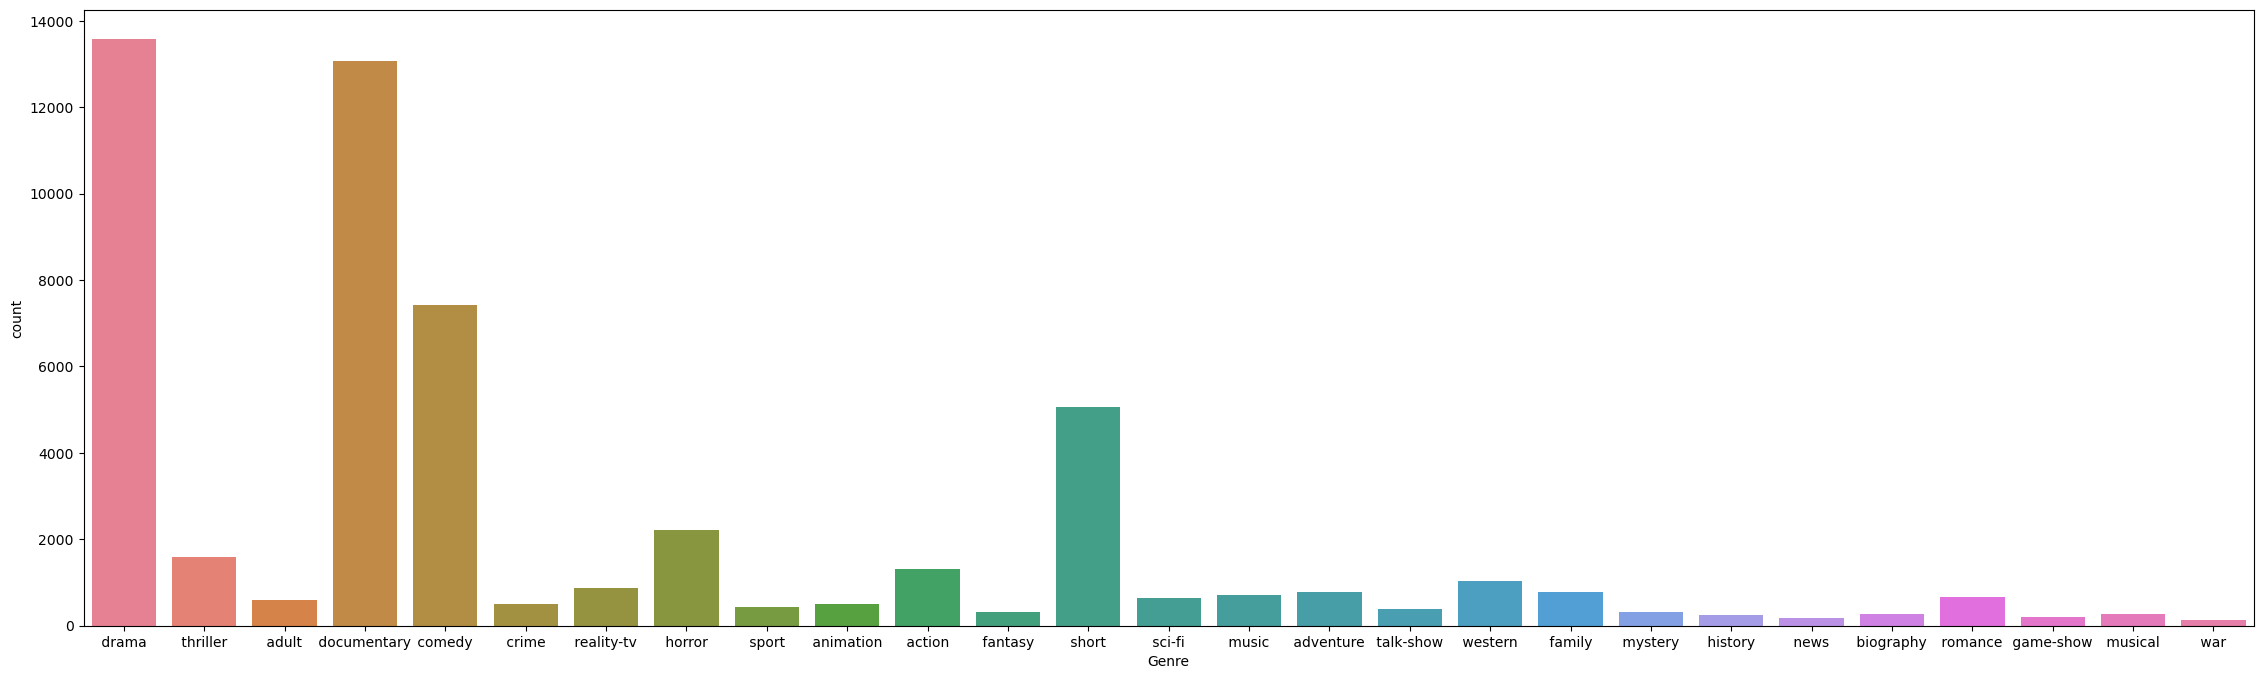

In [141]:
plt.figure(figsize=(28,8))
sns.countplot(movie_df,x='Genre',hue='Genre')

## Plotting Genre based word clouds

In [166]:
def generate_wordCloud(movie_df):
    genres = movie_df['Genre'].unique()
    for genre in genres:

        # Genre
        genre_df = movie_df[movie_df['Genre'] == genre]

        # Description
        description = genre_df['Description'].tolist()

        # Words
        words = ' '.join(description)
        tokens = word_tokenize(words)
        tokens = [t for t in tokens if t.isalpha()]
        tokens = [t for t in tokens if t.lower() not in stopwords.words('english')]
        counter = Counter(tokens)
        print("Preprocessing Done")
        
        # Extracting common words
        common_words = counter.most_common(20)
        wordCloud = WordCloud(width=800, height=400, random_state=42, max_font_size=110).generate_from_frequencies(dict(common_words))

        # Plotting data
        plt.figure(figsize=(10,5))
        plt.imshow(wordCloud, interpolation="bilinear")
        plt.axis("off")
        plt.title(f"Most common words in {genre} movies")
        plt.show()

Preprocessing Done


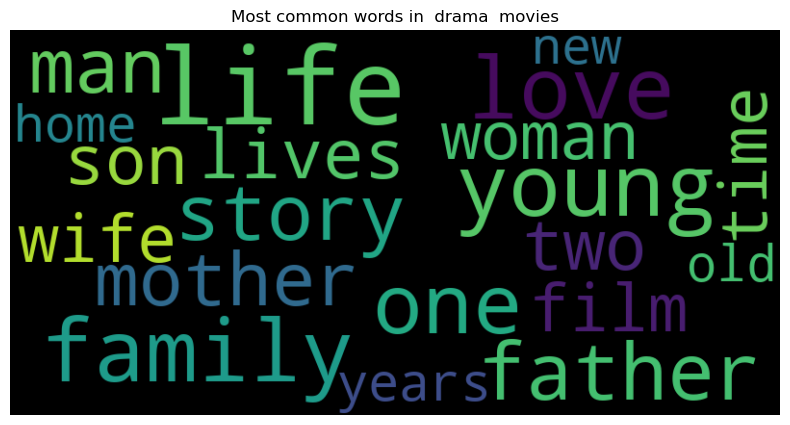

Preprocessing Done


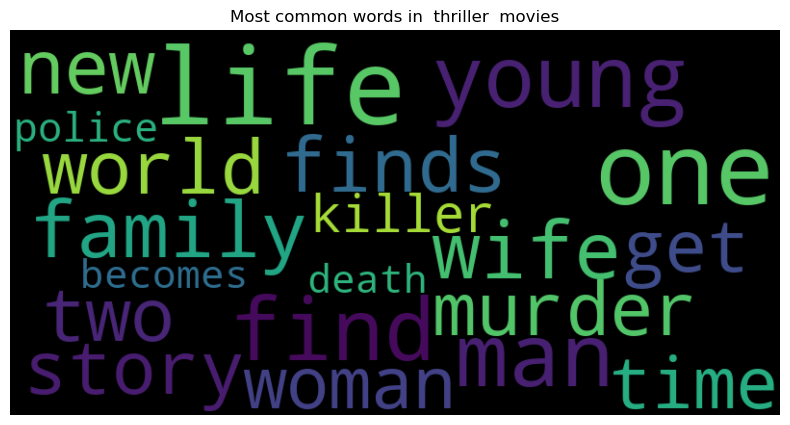

Preprocessing Done


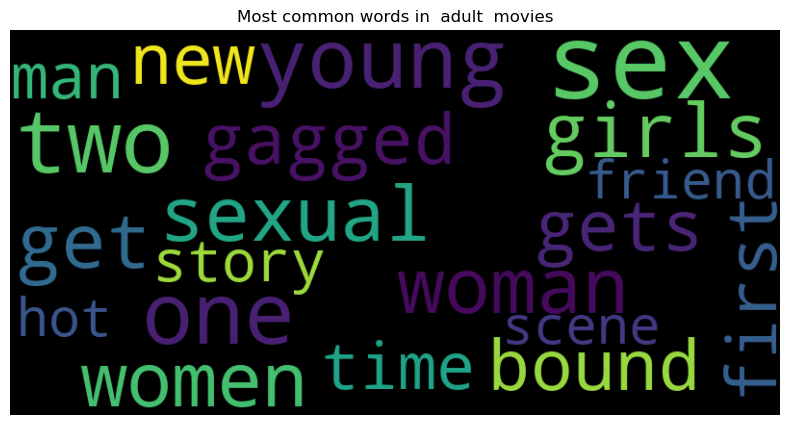

Preprocessing Done


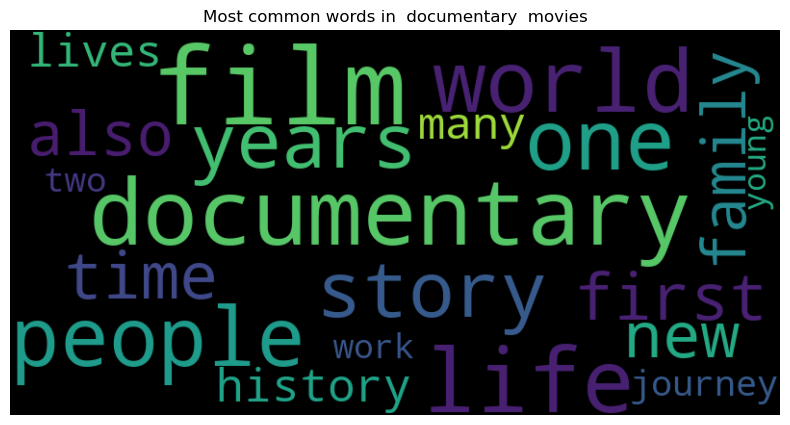

Preprocessing Done


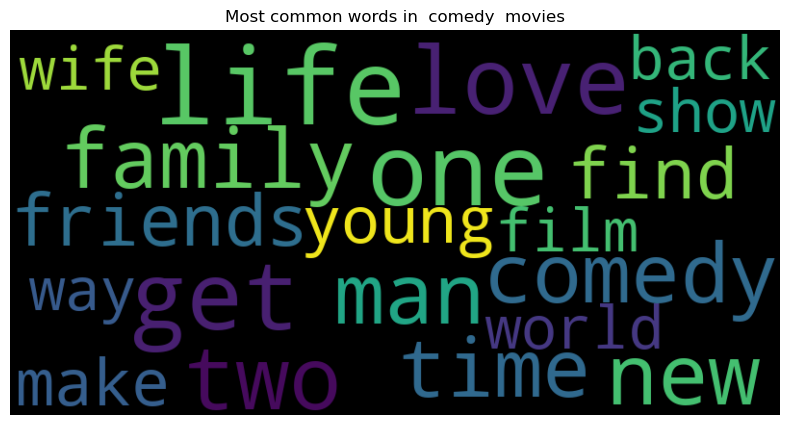

Preprocessing Done


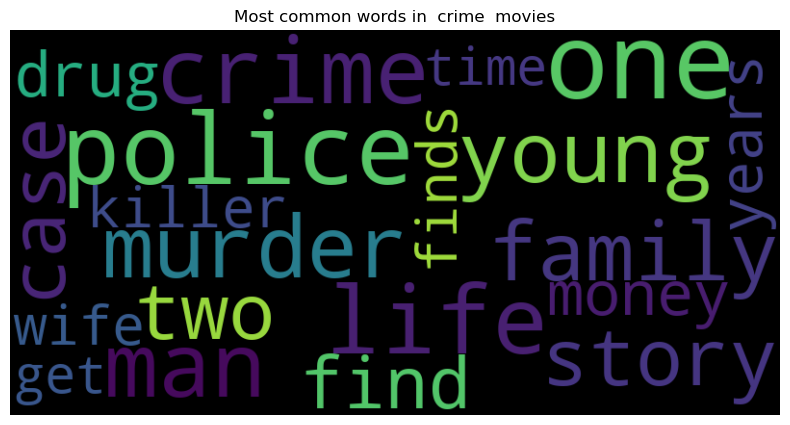

Preprocessing Done


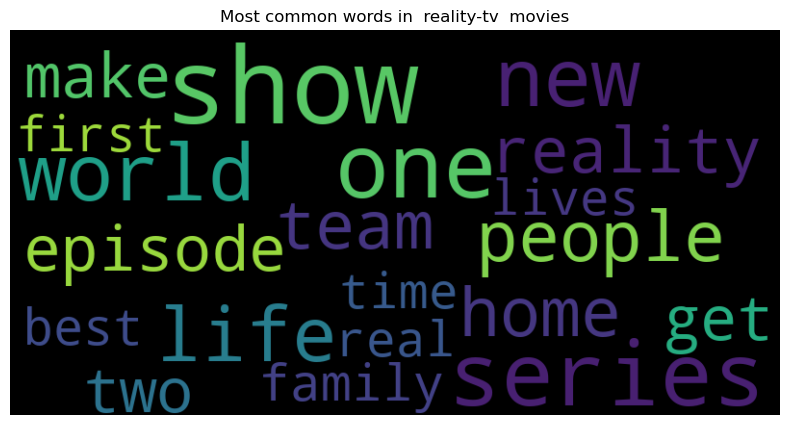

Preprocessing Done


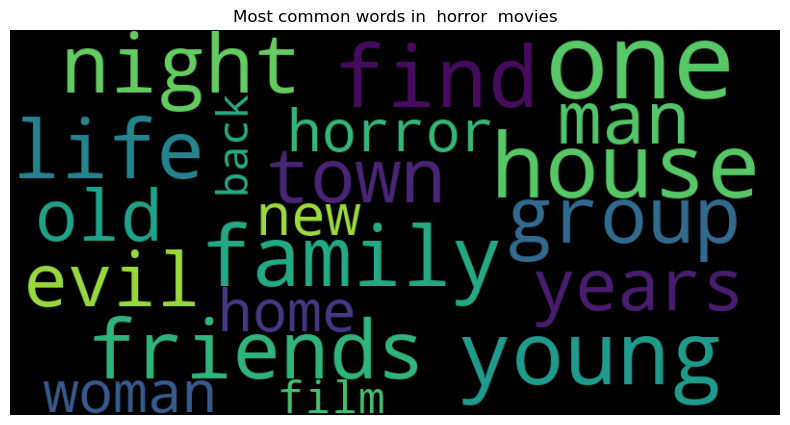

Preprocessing Done


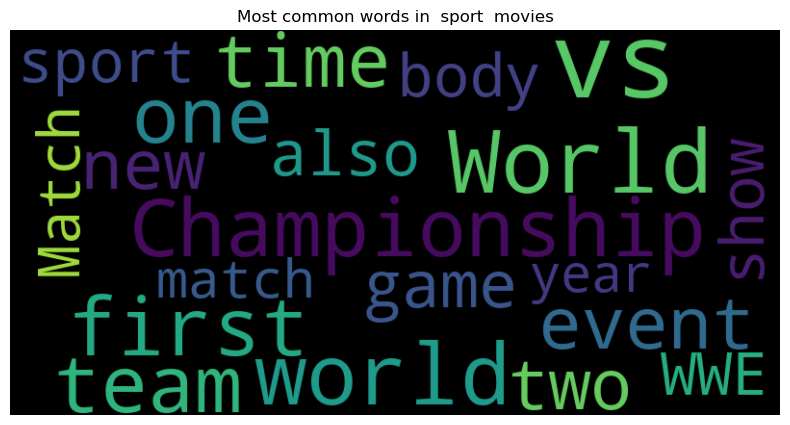

Preprocessing Done


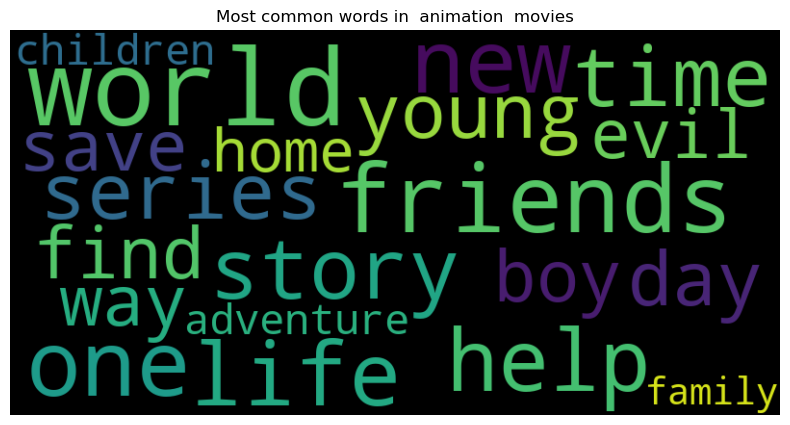

Preprocessing Done


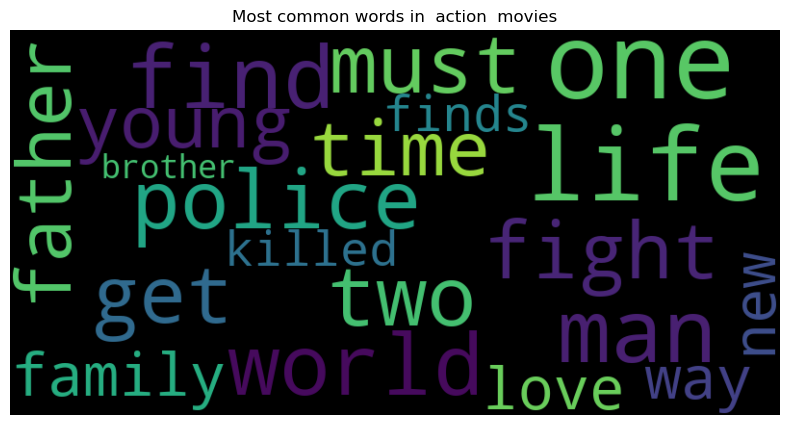

Preprocessing Done


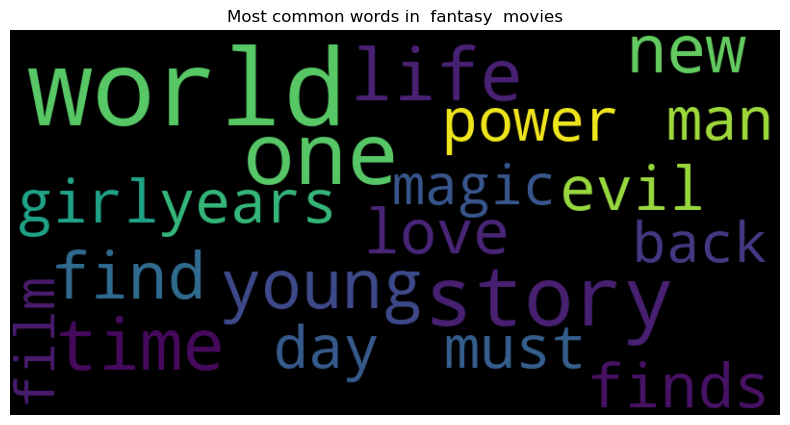

Preprocessing Done


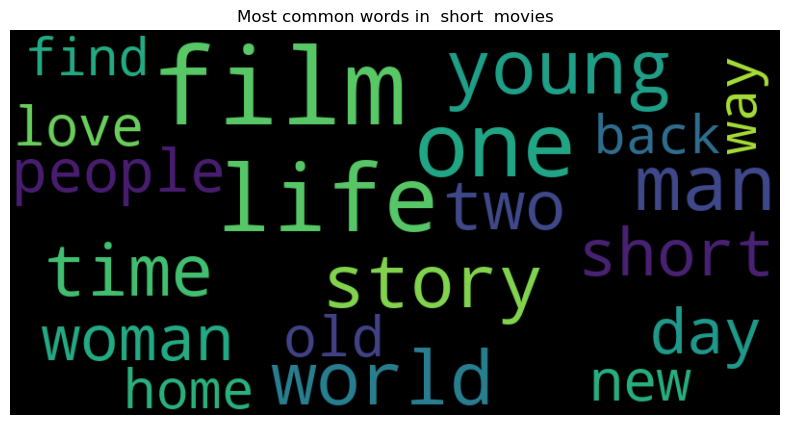

Preprocessing Done


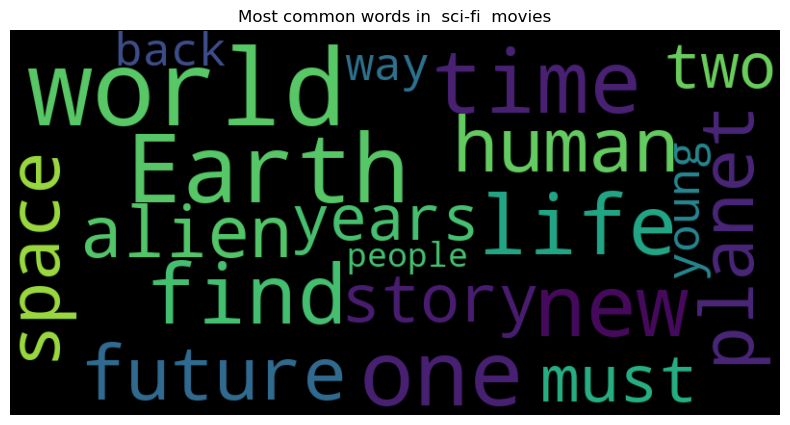

Preprocessing Done


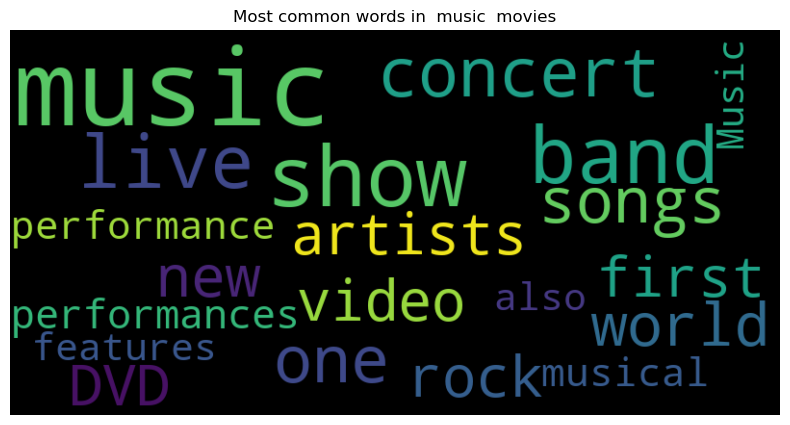

Preprocessing Done


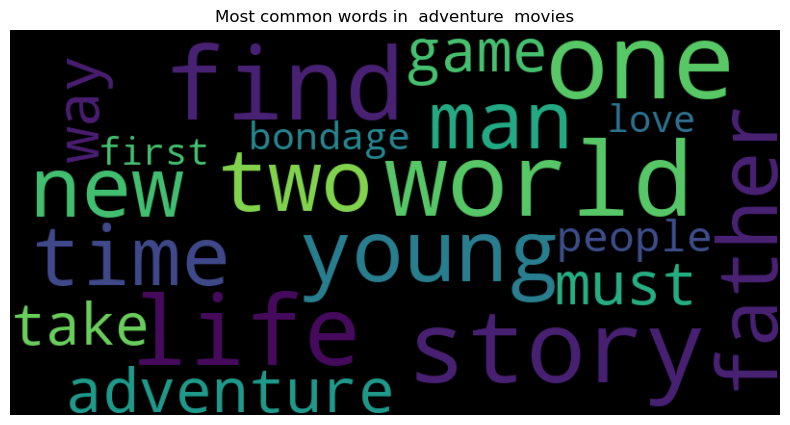

Preprocessing Done


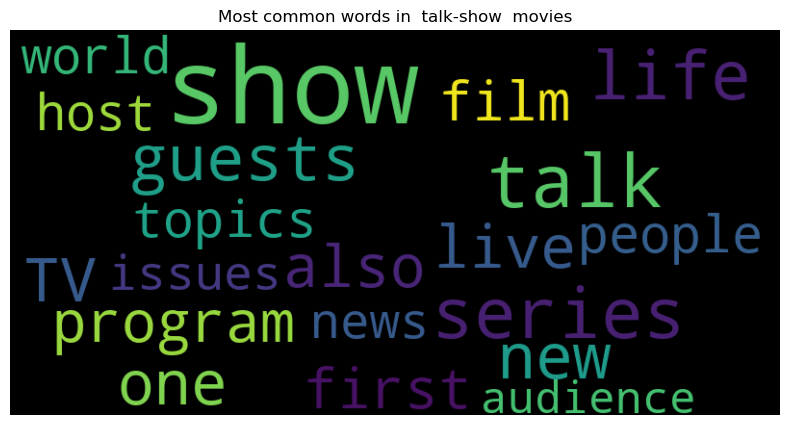

Preprocessing Done


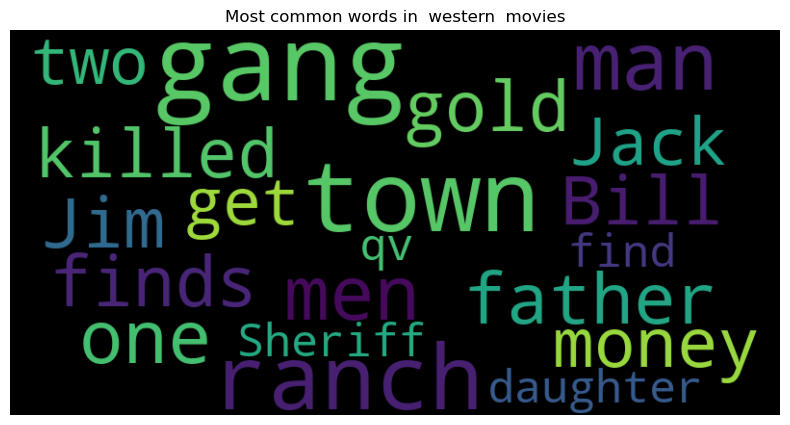

Preprocessing Done


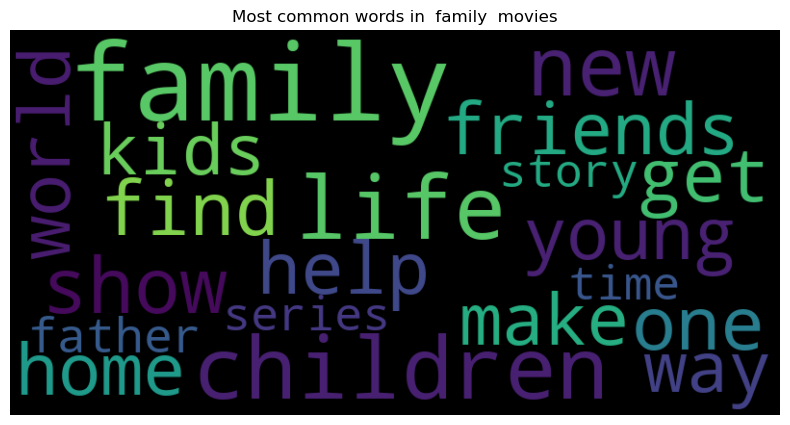

Preprocessing Done


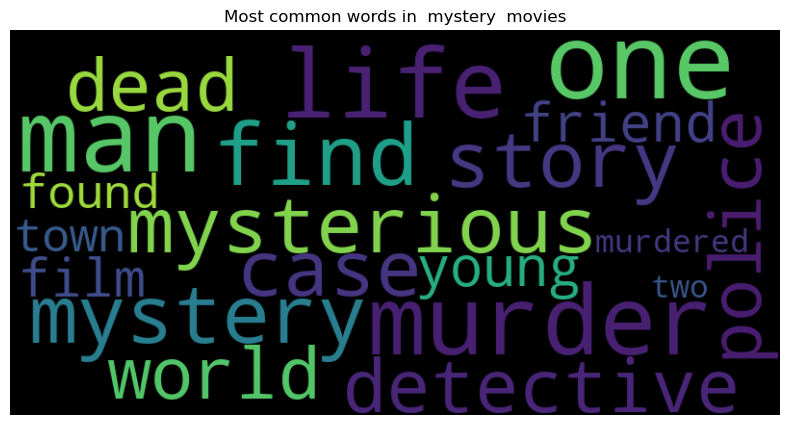

Preprocessing Done


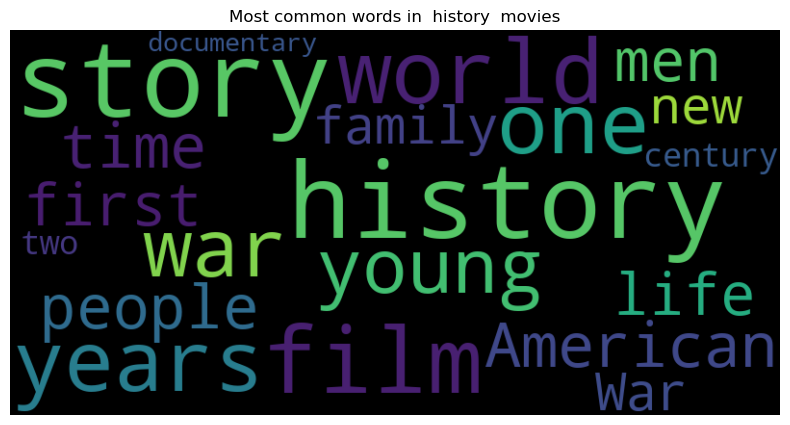

Preprocessing Done


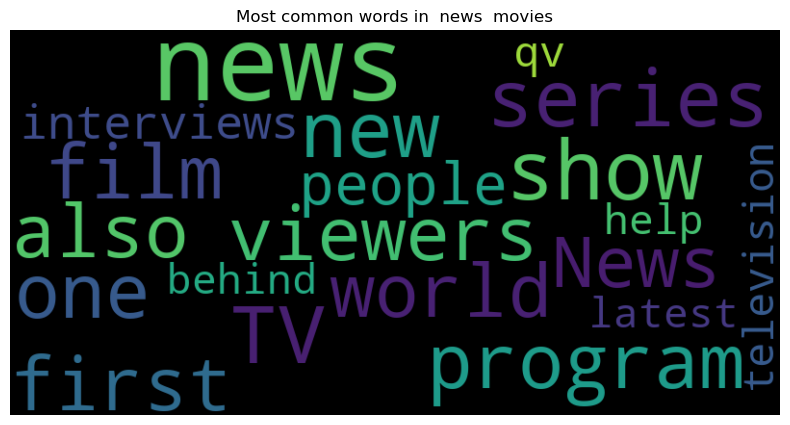

Preprocessing Done


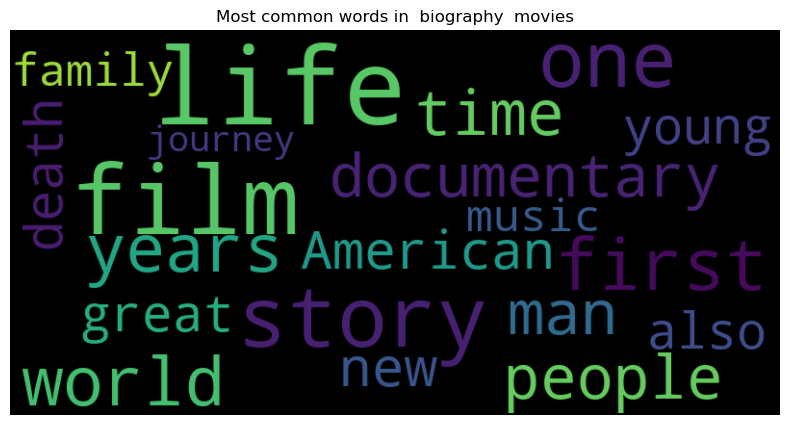

Preprocessing Done


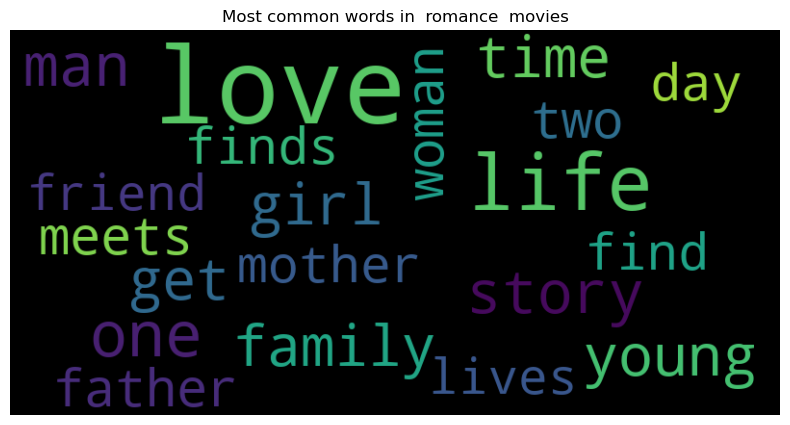

Preprocessing Done


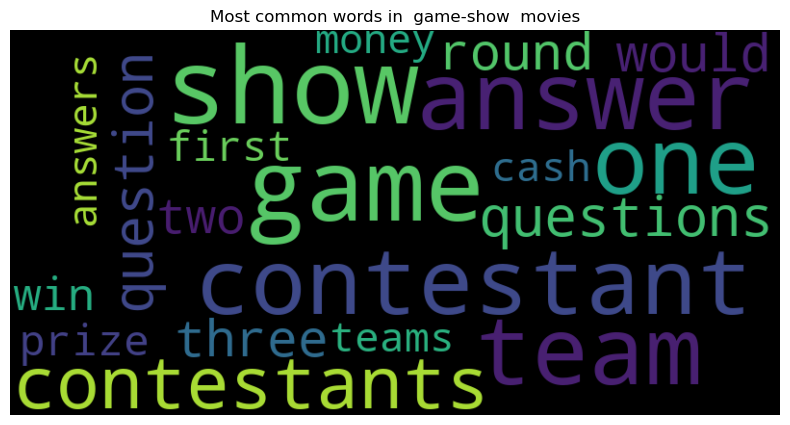

Preprocessing Done


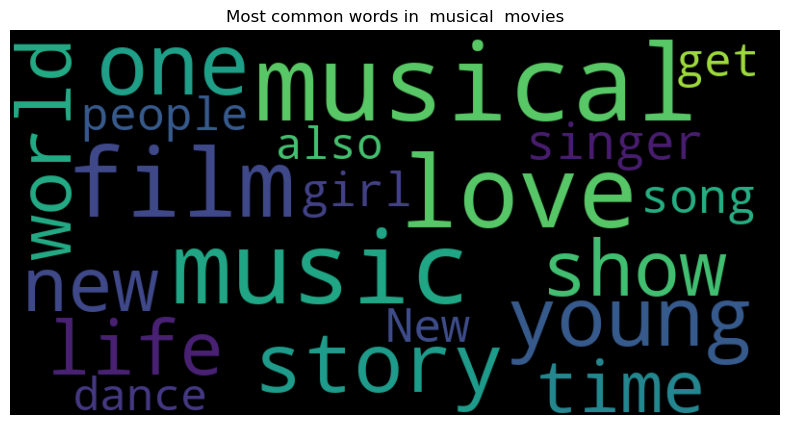

Preprocessing Done


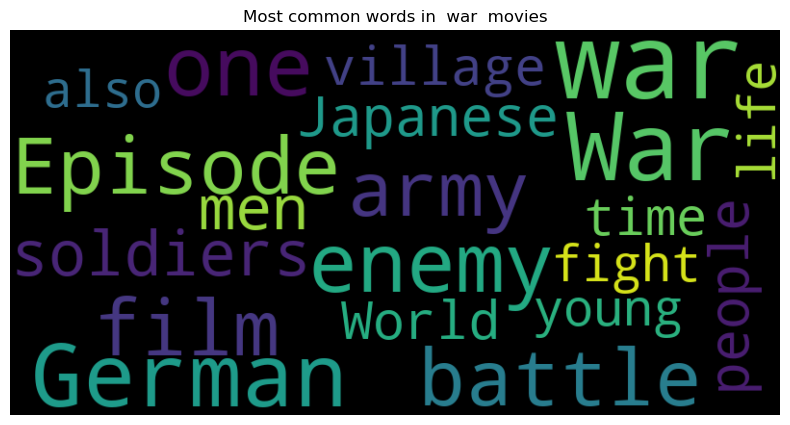

In [168]:
generate_wordCloud(movie_df)

## Preprocessing

In [ ]:
from sklearn.model_selection import 